In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load your dataset 
data = pd.read_csv('Academic.csv')

In [3]:
data.head()

,Mental Status,Study Hours per Week,Attendance Rate,Gender,Previous Physics average,Previous Chemistry average,Previous Mathematics average,Extracurricular Activities,Family Support,failures,...,freetime,goout,Dalc,Walc,absences,guardian,schoolsup,paidClass,Parent Education,plans
0,Normal,9.3,95.3,Male,53.23,50.61,52.5,NaN,Minimal,1,...,2,3,2,4,5,mother,High,NaN,High school,2
1,Severe,17.6,76.8,Female,52.54,51.40,62.4,High,Minimal,1,...,3,3,4,1,4,mother,High,NaN,High school,20
2,Moderate,8.8,89.3,Male,59.77,54.76,72.7,NaN,Minimal,1,...,3,3,1,1,2,father,High,NaN,NaN,15
3,Moderate,8.8,73.8,Male,53.21,77.21,69.3,High,NaN,1,...,5,2,1,2,6,father,High,NaN,Master,24
4,Moderate,17.9,38.6,Male,58.16,50.12,93.6,NaN,NaN,0,...,2,3,0,3,7,father,High,NaN,Degree,15


In [4]:
# Display basic information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Mental Status                  10000 non-null  object 
 1   Study Hours per Week           9523 non-null   float64
 2   Attendance Rate                9495 non-null   float64
 3   Gender                         10000 non-null  object 
 4   Previous Physics average       10000 non-null  float64
 5   Previous Chemistry average     10000 non-null  float64
 6   Previous Mathematics  average  9473 non-null   float64
 7   Extracurricular Activities     5103 non-null   object 
 8   Family Support                 5977 non-null   object 
 9   failures                       10000 non-null  int64  
 10  famrel                         10000 non-null  float64
 11  freetime                       10000 non-null  int64  
 12  goout                     

In [5]:
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
       Mental Status  Study Hours per Week  Attendance Rate Gender  \
count          10000           9523.000000      9495.000000  10000   
unique             4                   NaN              NaN      2   
top         Moderate                   NaN              NaN   Male   
freq            2519                   NaN              NaN   5044   
mean             NaN              9.977423        75.354260    NaN   
std              NaN              5.056387        20.354069    NaN   
min              NaN             -9.600000       -10.900000    NaN   
25%              NaN              6.600000        61.800000    NaN   
50%              NaN             10.000000        75.300000    NaN   
75%              NaN             13.400000        88.800000    NaN   
max              NaN             45.000000       150.000000    NaN   

        Previous Physics average  Previous Chemistry average  \
count               10000.000000                10000.000000   
unique    

In [6]:
print("\nMissing Values:")
print(data.isna().sum())


Missing Values:
Mental Status                       0
Study Hours per Week              477
Attendance Rate                   505
Gender                              0
Previous Physics average            0
Previous Chemistry average          0
Previous Mathematics  average     527
Extracurricular Activities       4897
Family Support                   4023
failures                            0
famrel                              0
freetime                            0
goout                               0
Dalc                                0
Walc                                0
absences                            0
guardian                            0
schoolsup                        1137
paidClass                        7898
Parent Education                 1637
plans                               0
dtype: int64


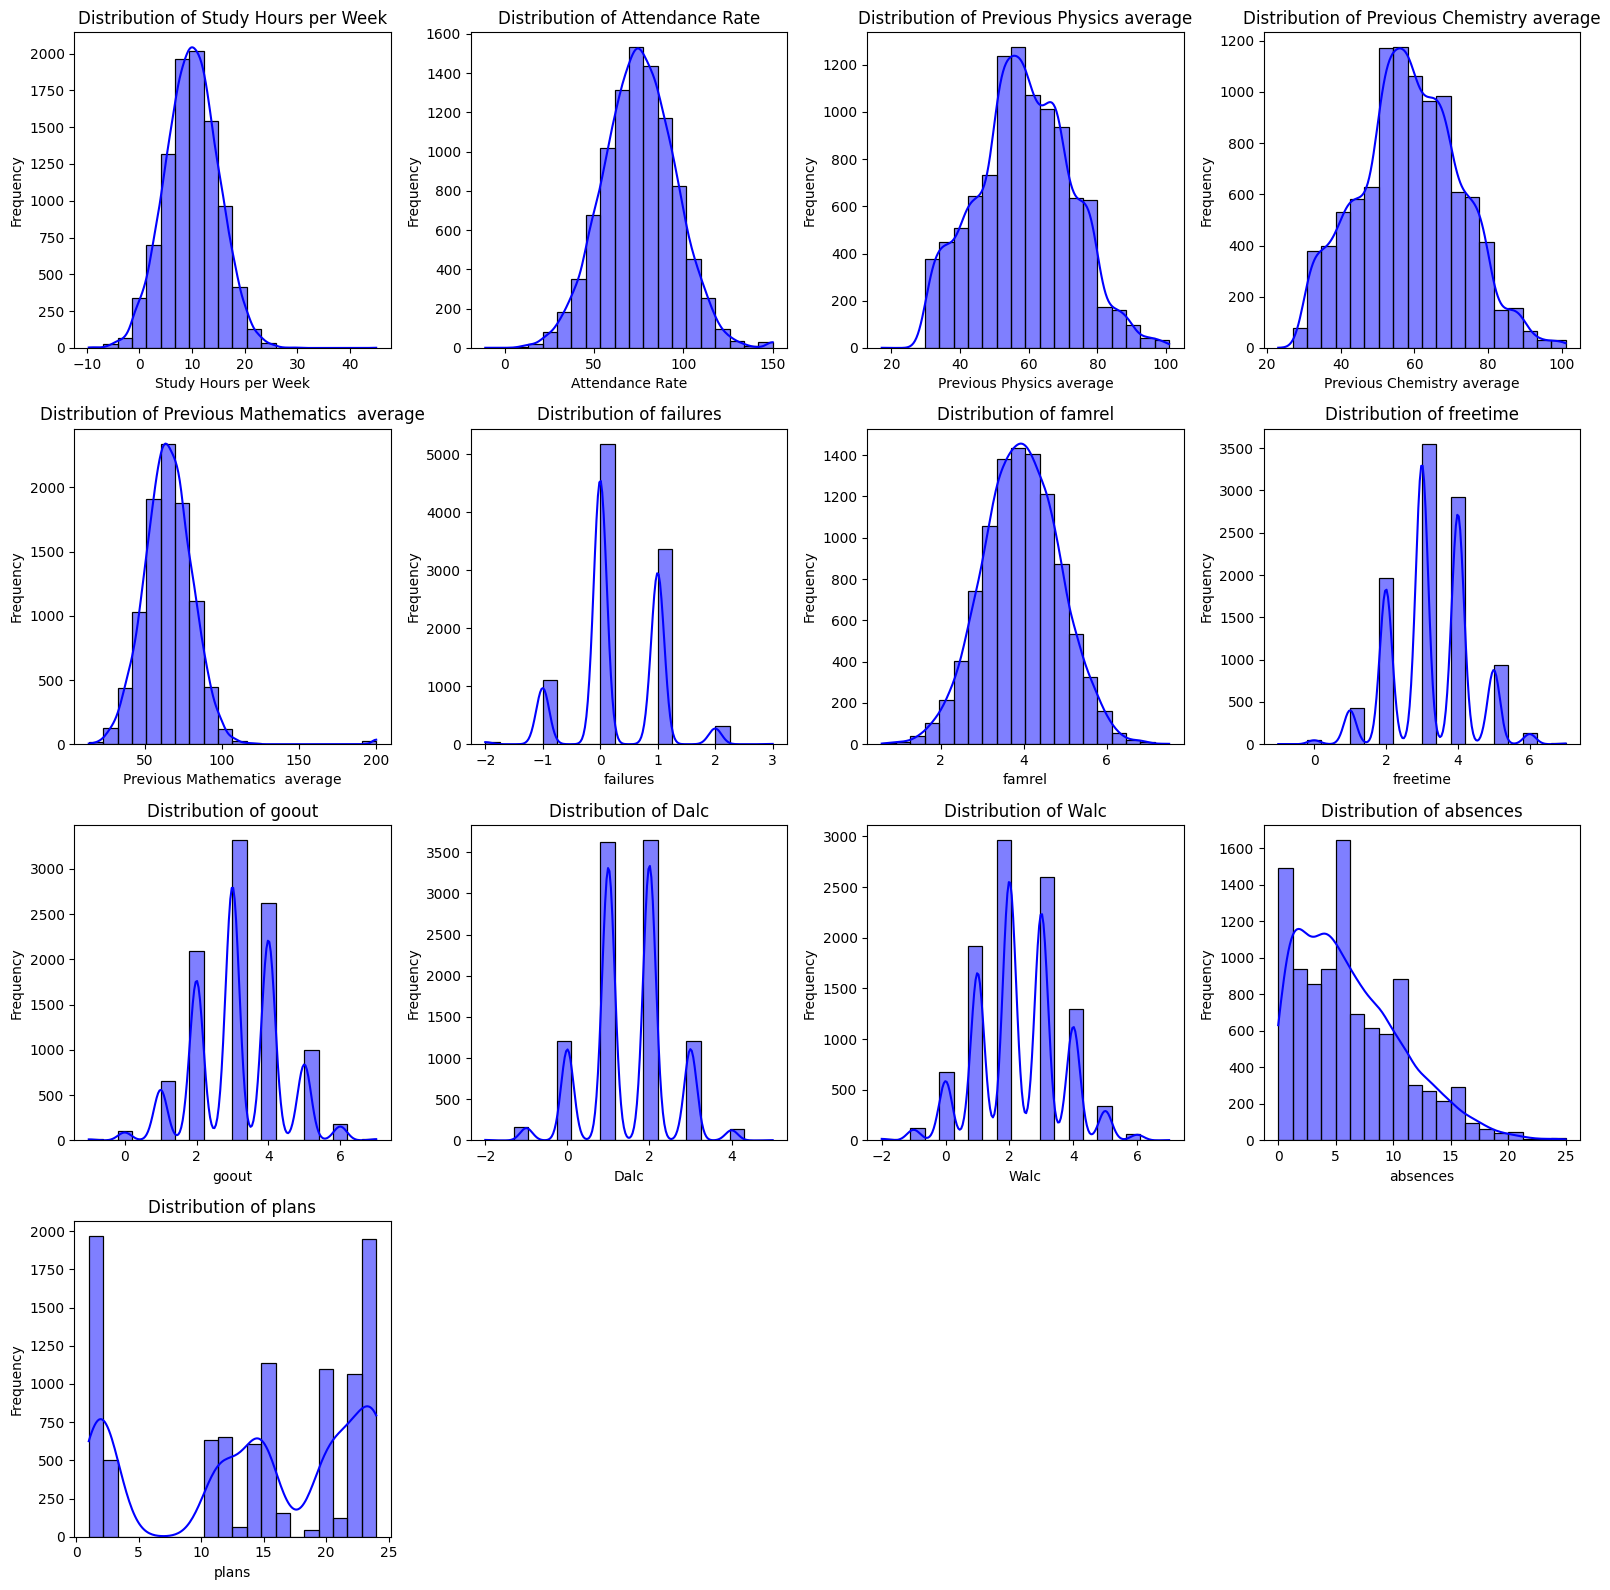

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Create a figure with 1 row and 4 columns
# Adjust the number of columns if you have more or fewer numeric columns
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # To ensure enough rows for all charts

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate over them

# Create histograms for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, bins=20, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

C:\conda_tmp\ipykernel_21068\2139643322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', ax=axes[i])
C:\conda_tmp\ipykernel_21068\2139643322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', ax=axes[i])
C:\conda_tmp\ipykernel_21068\2139643322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', ax=axes[i])
C:\conda_tmp\ipykernel_21068\2139643322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

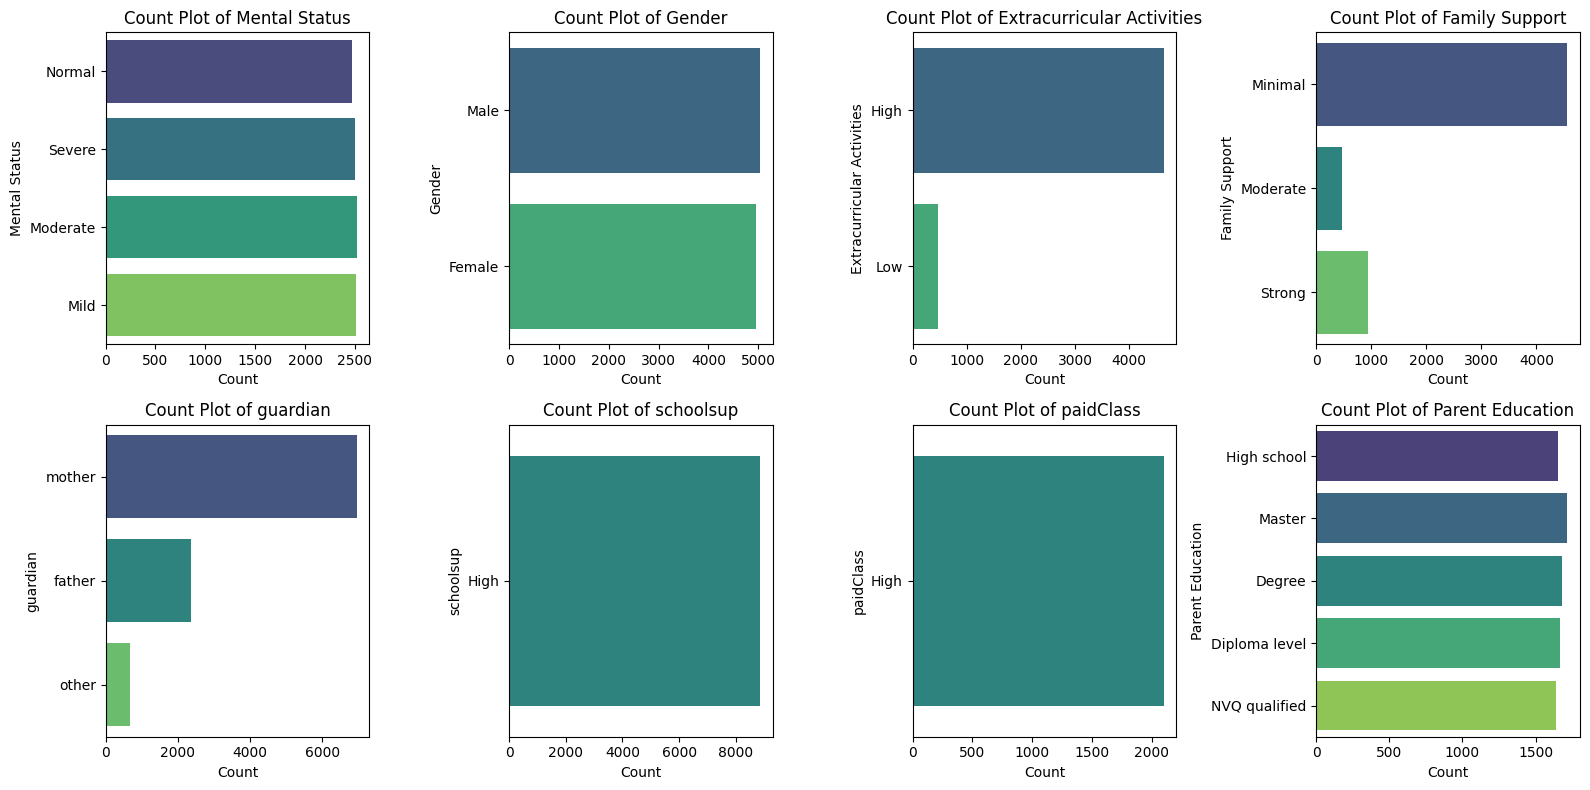

In [8]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Create a figure with 1 row and 4 columns
n_cols = 4
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Ensure enough rows for all charts

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate over them

# Create count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(y=data[col], palette='viridis', ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Count")

# Remove any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

In [9]:
# Separate features (X) and target (y)
X = data.drop('plans', axis=1)  # Replace 'target' with the name of your target variable
y = data['plans']

In [10]:
# Replace NaN with None in specific categorical columns
categorical_columns_to_fix = ['schoolsup', 'paidClass', 'Parent Education', 'Extracurricular Activities', 'Family Support']  # Replace with the actual column names

# Replace NaN/nan with None explicitly
for col in categorical_columns_to_fix:
    X[col] = X[col].replace({np.nan: 'None', 'nan': 'None'})

# Verify the changes
print(X[categorical_columns_to_fix].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   schoolsup                   10000 non-null  object
 1   paidClass                   10000 non-null  object
 2   Parent Education            10000 non-null  object
 3   Extracurricular Activities  10000 non-null  object
 4   Family Support              10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB
None


In [11]:
# Replace NaN with None in specific categorical columns
categorical_columns_to_fix = ['Study Hours per Week', 'Attendance Rate', 'Previous Mathematics  average']

# Replace NaN/nan with None explicitly
for col in categorical_columns_to_fix:
    X[col] = X[col].replace({np.nan: 0, 'nan': 0})

# Verify the changes
print(X[categorical_columns_to_fix].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study Hours per Week           10000 non-null  float64
 1   Attendance Rate                10000 non-null  float64
 2   Previous Mathematics  average  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB
None


In [12]:
# Identify categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numeric_columns = X.select_dtypes(include=['number']).columns

In [13]:
# Preprocessing: One-Hot Encoding for categorical and scaling for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),  # Scale the numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [14]:
# Replace regression models with classification models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC()
}


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_performance[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9875
Gradient Boosting Accuracy: 0.9990
Support Vector Classifier Accuracy: 0.8850


In [17]:
# Find the best model
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]
print(f"Best model: {best_model_name}")

Best model: Gradient Boosting


In [18]:
# Save the best model
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
best_pipeline.fit(X_train, y_train)
joblib.dump(best_pipeline, f"best_model.pkl")
print(f"Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [19]:
# Save the scaler and encoder separately
scaler = preprocessor.named_transformers_['num']
encoder = preprocessor.named_transformers_['cat']

# Save the scaler and encoder
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

print("Scaler and Encoder saved as 'scaler.pkl' and 'encoder.pkl'")


Scaler and Encoder saved as 'scaler.pkl' and 'encoder.pkl'


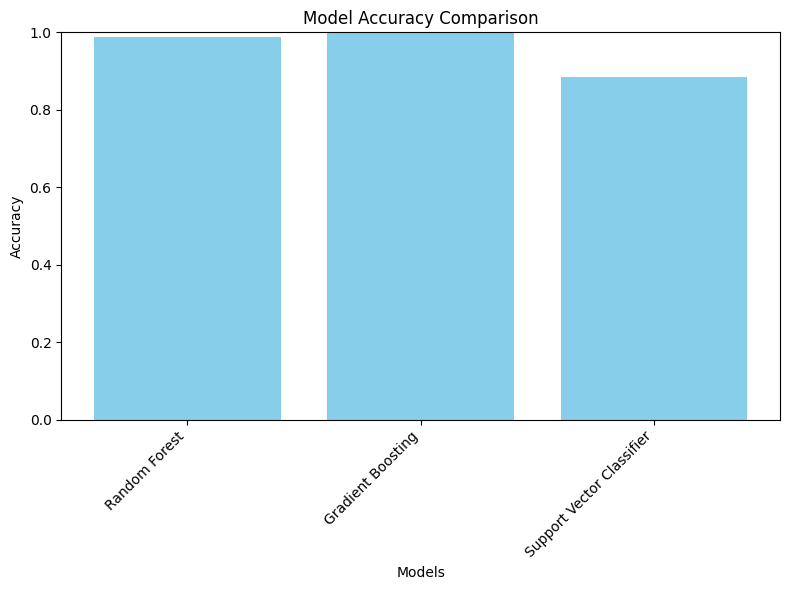

In [20]:
# Step 1: Prepare data for plotting
model_names = list(model_performance.keys())
accuracies = list(model_performance.values())

# Step 2: Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate model names for better readability
plt.tight_layout()  # Adjust layout to prevent overlap

# Step 3: Display the plot
plt.show()

In [30]:
import joblib
import pandas as pd

# Step 1: Load the saved best model pipeline
best_model = joblib.load("best_model.pkl")  # Load the best model pipeline

# Step 2: Prepare the sample input
sample_input = {
    'Mental Status': 'Mild',  # Categorical feature
    'Study Hours per Week': 22,  # Numeric feature
    'Attendance Rate': 82,  # Numeric feature
    'Gender': 'Male',  # Categorical feature
    'Previous Physics average': 79,  # Numeric feature
    'Previous Chemistry average': 70,  # Numeric feature
    'Previous Mathematics  average': 80,  # Numeric feature
    'Extracurricular Activities': 'Low',  # Categorical feature
    'Family Support': 'Minimal',  # Categorical feature
    'failures': 2,  # Numeric feature
    'famrel': 4.2,  # Numeric feature
    'freetime': 3,  # Numeric feature
    'goout': 3,  # Numeric feature
    'Dalc': 1,  # Numeric feature
    'Walc': 1,  # Numeric feature
    'absences': 4,  # Numeric feature
    'guardian': 'mother',  # Categorical feature
    'schoolsup': 'High',  # Categorical feature
    'paidClass': 'None',  # Categorical feature
    'Parent Education': 'Degree'  # Categorical feature
}

# Convert the sample input to a DataFrame (this step is required for the encoder)
sample_input_df = pd.DataFrame([sample_input])

# Step 3: Use the full pipeline to preprocess the data and make a prediction
# The pipeline has the preprocessing steps (scaler + encoder) built-in
predicted_class = best_model.predict(sample_input_df)

# Step 4: Output the prediction
print(f"Predicted class for the input: {predicted_class[0]}")


Predicted class for the input: 12


In [29]:
# Define the columns (categorical and numeric)
categorical_columns = ['Mental Status', 'Gender', 'Extracurricular Activities', 'Family Support',
                        'guardian', 'schoolsup', 'paidClass', 'Parent Education']
numeric_columns = ['Attendance Rate', 'Study Hours per Week', 'Previous Mathematics average', 
                   'Previous Physics average', 'Previous Chemistry average', 'failures', 
                   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']

# Step 1: Get columns scaled by the scaler (i.e., numeric columns)
print("Numeric columns scaled by the scaler:")
print(numeric_columns)

# Step 2: Get categories for each categorical column from the encoder
print("\nCategories for each categorical column from the encoder:")
for column in categorical_columns:
    categories = encoder.categories_[categorical_columns.index(column)]
    print(f"{column}: {categories.tolist()}")

# Step 3: Get the model's class labels (for classification models)
if hasattr(best_model, 'classes_'):
    print("\nModel classes (target labels):")
    print(best_model.classes_)

# Step 4: Optionally, if you want to inspect scaler parameters (mean and std)
print("\nScaler parameters (mean and standard deviation for each numeric column):")
for i, column in enumerate(numeric_columns):
    mean = scaler.mean_[i]
    std = scaler.scale_[i]
    print(f"{column} - Mean: {mean:.2f}, Std: {std:.2f}")

Numeric columns scaled by the scaler:
['Attendance Rate', 'Study Hours per Week', 'Previous Mathematics average', 'Previous Physics average', 'Previous Chemistry average', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']

Categories for each categorical column from the encoder:
Mental Status: ['Mild', 'Moderate', 'Normal', 'Severe']
Gender: ['Female', 'Male']
Extracurricular Activities: ['High', 'Low', 'None']
Family Support: ['Minimal', 'Moderate', 'None', 'Strong']
guardian: ['father', 'mother', 'other']
schoolsup: ['High', 'None']
paidClass: ['High', 'None']
Parent Education: ['Degree', 'Diploma level', 'High school', 'Master', 'NVQ qualified', 'None']

Model classes (target labels):
[ 1  2  3 11 12 13 14 15 16 17 19 20 21 22 23 24]

Scaler parameters (mean and standard deviation for each numeric column):
Attendance Rate - Mean: 9.54, Std: 5.35
Study Hours per Week - Mean: 71.52, Std: 25.78
Previous Mathematics average - Mean: 58.58, Std: 13.67
Previous Physics